# Taller 7
Métodos Computacionales para Políticas Públicas - URosario

**Entrega: viernes 3-abr-2020 11:59 PM**

<div class="alert alert-success">

**Juan Sebastián Gómez Moreno** <br><br>

Juansebastian.gomezm@urosario.edu.co
</div>

## Instrucciones:
- Guarde una copia de este *Jupyter Notebook* en su computador, idealmente en una carpeta destinada al material del curso.
- Modifique el nombre del archivo del *notebook*, agregando al final un guión inferior y su nombre y apellido, separados estos últimos por otro guión inferior. Por ejemplo, mi *notebook* se llamaría: mcpp_taller7_santiago_matallana
- Marque el *notebook* con su nombre y e-mail en el bloque verde arriba. Reemplace el texto "[Su nombre acá]" con su nombre y apellido. Similar para su e-mail.
- Desarrolle la totalidad del taller sobre este *notebook*, insertando las celdas que sea necesario debajo de cada pregunta. Haga buen uso de las celdas para código y de las celdas tipo *markdown* según el caso.
- Recuerde salvar periódicamente sus avances.
- Cuando termine el taller:
    1. Descárguelo en PDF. Si tiene algún problema con la conversión, descárguelo en HTML.
    2. Suba todos los archivos a su repositorio en GitHub, en una carpeta destinada exclusivamente para este taller, antes de la fecha y hora límites.

(Todos los ejercicios tienen el mismo valor.)

---

Este taller tiene dos partes. Una obligatoria, relativamente fácil, y otra voluntaria y más retadora. Los invito a intentar desarrollar el taller en su totalidad. (Buen plan para el aislamiento obligatorio.)

En este taller exploraremos los datos de crimen de Chicago. 

Descargue los datos de crimen del Chicago Data Portal solo para el año 2015 (https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-present/ijzp-q8t2/data).

### Parte obligatoria

### 1.
Calcule el número de crímenes en cada Community Area en 2015. Haga un gráfico de barras que lo ilustre.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

crimes_db = pd.read_csv('Crimes_-_2001_to_present.csv', parse_dates=['Date'])
crimes_db.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10201852,HY389096,2015-01-01,008XX N MAPLEWOOD AVE,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,APARTMENT,False,True,...,1,24,26,1159250.0,1905420.0,2015,08/20/2015 04:17:37 PM,41.896198,-87.690553,"(41.896197984, -87.690552821)"
1,10060114,HY239140,2015-01-01,069XX S CORNELL AVE,1751,OFFENSE INVOLVING CHILDREN,CRIM SEX ABUSE BY FAM MEMBER,RESIDENCE,False,False,...,5,43,20,1188551.0,1859284.0,2015,08/17/2015 03:03:40 PM,41.768946,-87.584415,"(41.768945532, -87.584414851)"
2,10210454,HY397301,2015-01-01,049XX W WABANSIA AVE,0266,CRIM SEXUAL ASSAULT,PREDATORY,RESIDENCE,False,True,...,37,25,02,NaN,NaN,2015,08/31/2015 03:43:09 PM,NaN,NaN,NaN
3,10025440,HY214766,2015-01-01,004XX E 80TH ST,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,RESIDENCE,False,True,...,6,44,11,1180776.0,1852066.0,2015,08/17/2015 03:03:40 PM,41.749321,-87.613135,"(41.749320815, -87.613135423)"
4,10225520,HY412735,2015-01-01,075XX S BLACKSTONE AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,...,5,43,11,NaN,NaN,2015,09/10/2015 11:43:14 AM,NaN,NaN,NaN


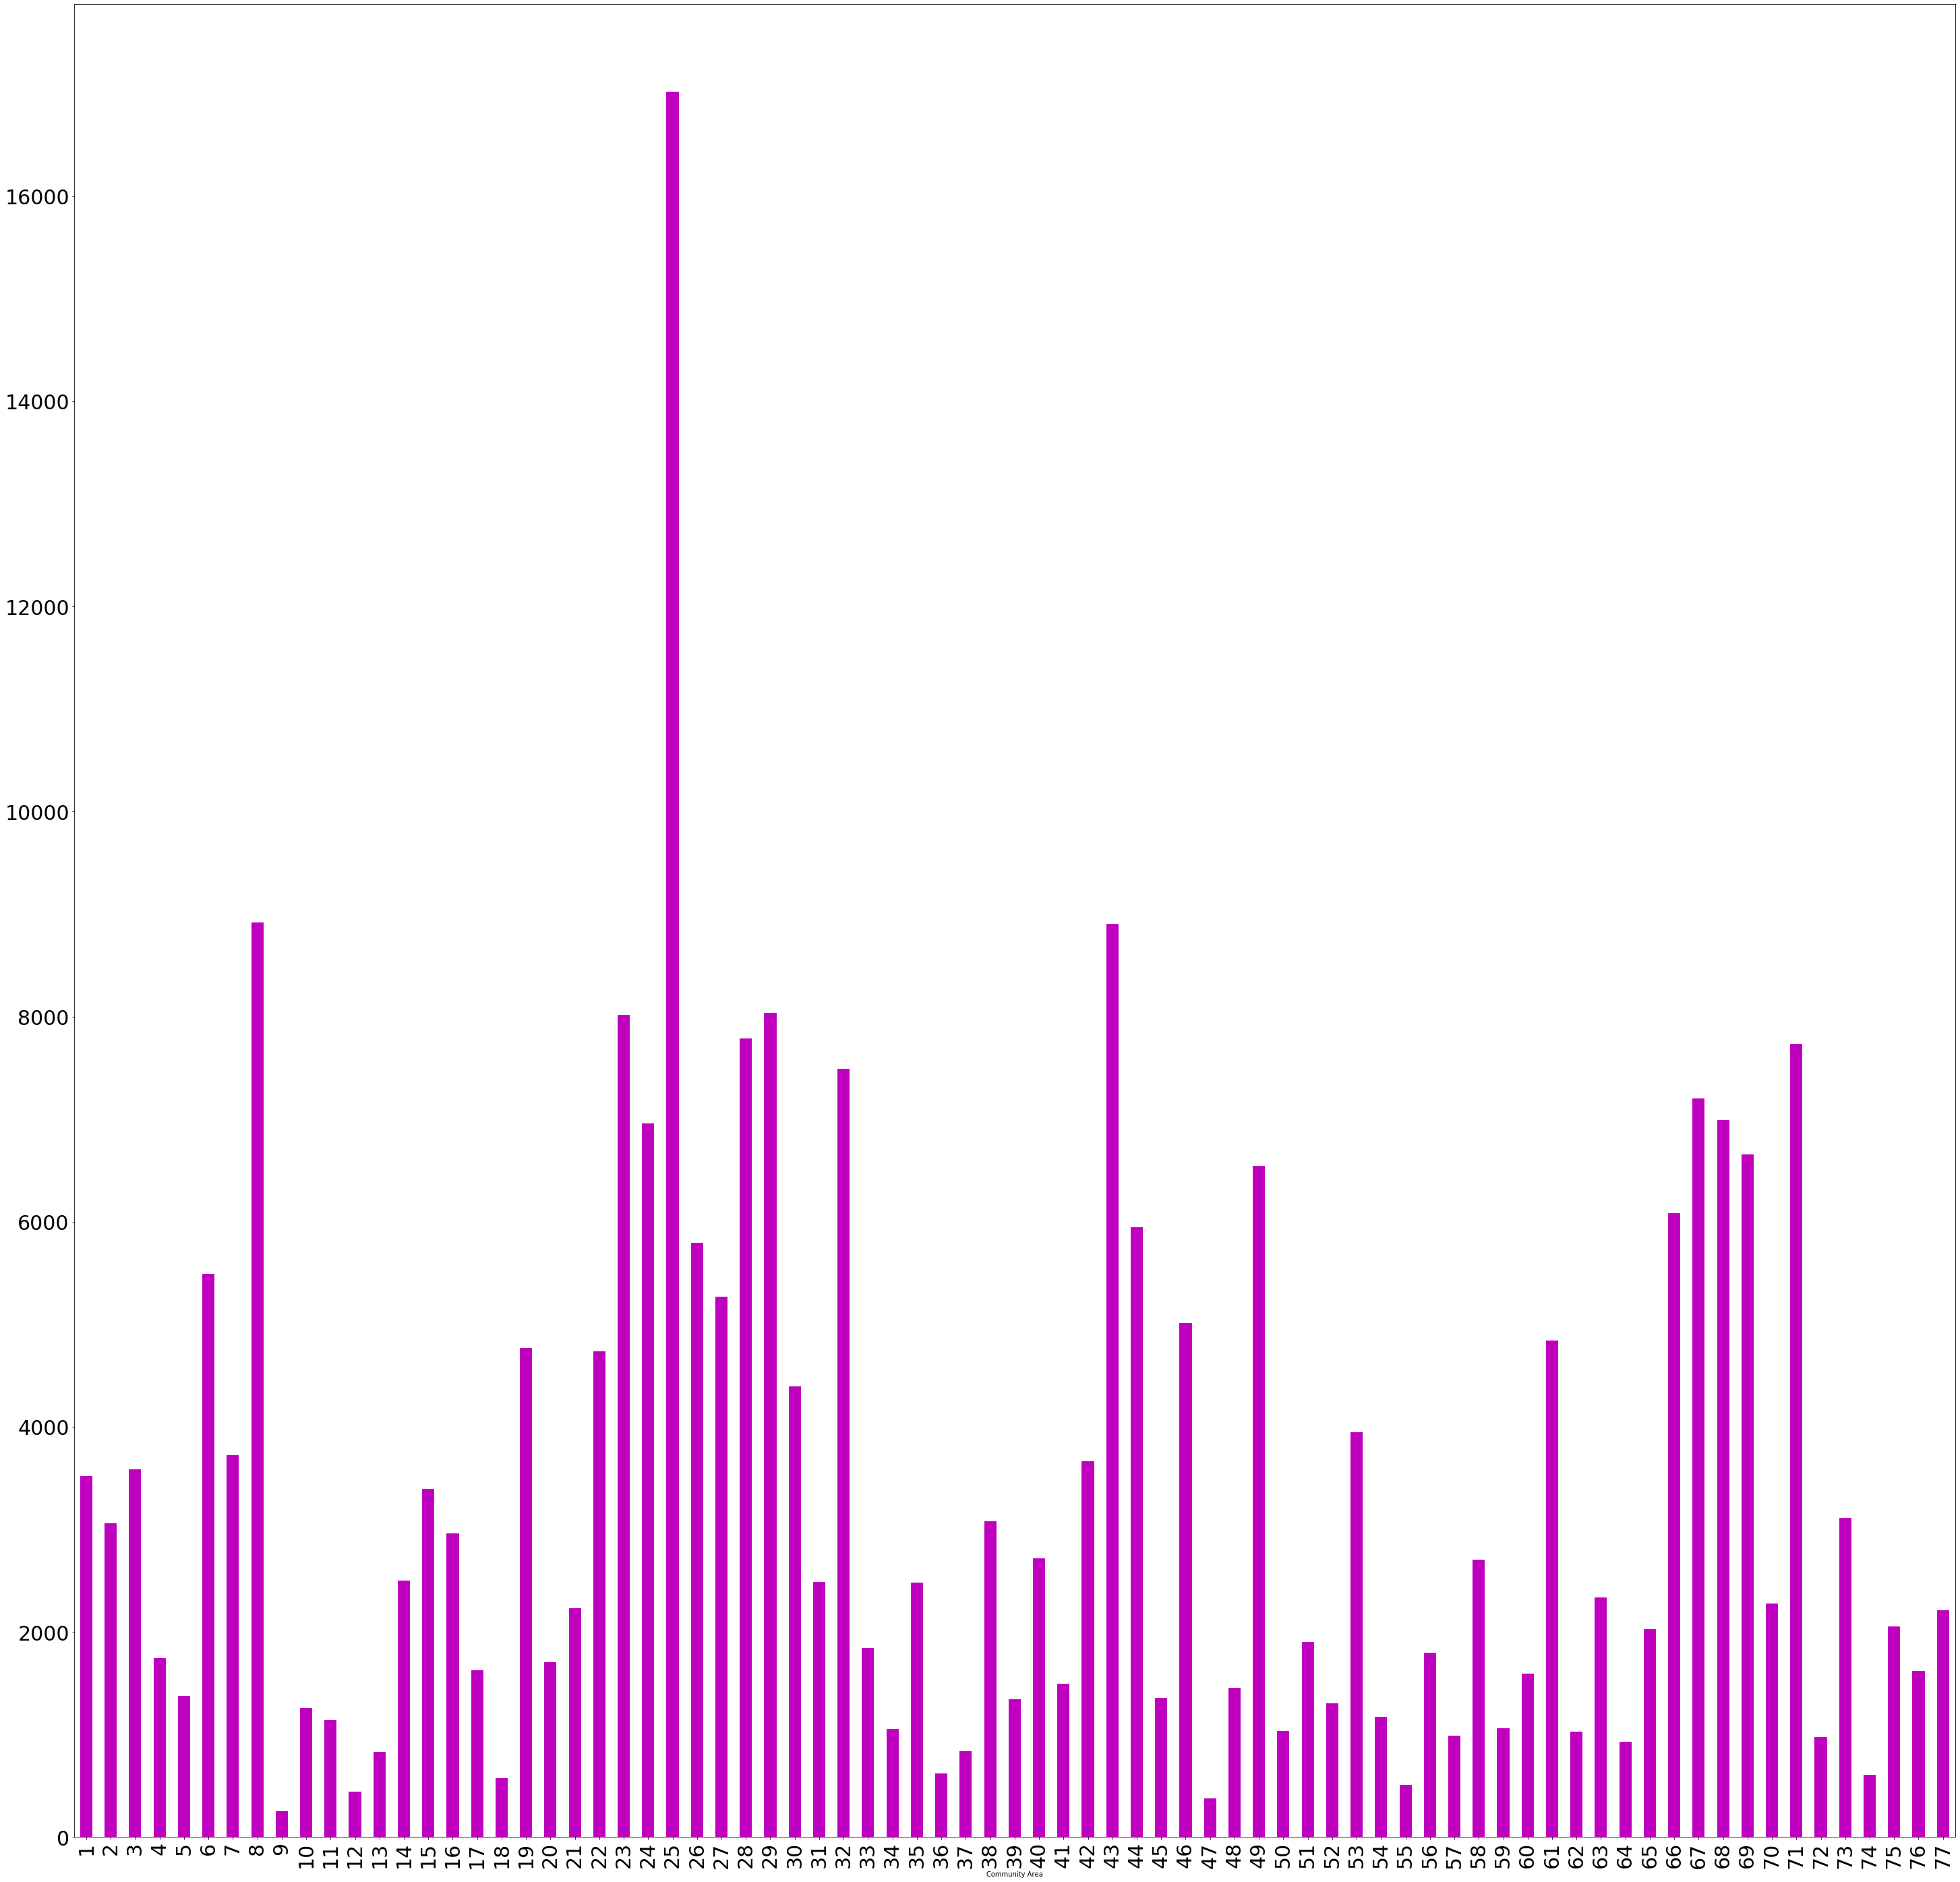

In [11]:
crimes_by_ca = crimes_db.groupby(['Community Area'])['ID'].agg('count')
bar_graph = crimes_by_ca.plot.bar(fontsize = 30, color  = 'm')
plt.rcParams['figure.figsize'] = [30.0,30.0]

---

### 2.
Ordene las Community Areas de acuerdo con el número de crímenes. ¿Qué Community Area (por nombre, idealmente) presenta el mayor número de crímenes? ¿El menor?

In [3]:
orden = pd.crosstab(index = crimes_db['Community Area'], columns = 'count')
orden.sort_values(['count']).iloc[0]

col_0
count    254
Name: 9, dtype: int64

In [4]:
print('El Community Area con el menor número de crímenes es el área 9 con 254 casos reportados')

El Community Area con el menor número de crímenes es el área 9 con 254 casos reportados


In [5]:
orden.sort_values(['count'], ascending = False).iloc[0]

col_0
count    17020
Name: 25, dtype: int64

In [6]:
print('El Community Area con el mayor número de crímenes es el área 25 con 17020 casos reportados')

El Community Area con el mayor número de crímenes es el área 25 con 17020 casos reportados


---

### 3.
Cree una tabla cuyas filas sean días del año (yyyy-mm-dd) y las columnas las 77 Community Areas. En cada campo de la tabla deberá haber el correspondiente número de crímenes. Seleccione algunas Community Areas que le llamen la atención y haga un gráfico de serie de tiempo.

Pista: El siguiente código puede serle útil.

In [7]:
# Create function to strip time from date field, and use it to create another column
def to_day(timestamp):
    return timestamp.replace(minute=0,hour=0, second=0)

crimes_db['Day'] = crimes_db['Date'].apply(to_day)
dates = pd.crosstab(index = crimes_db['Day'], columns = crimes_db['Community Area'])

dates.head()

Community Area,1,2,3,4,5,6,7,8,9,10,...,68,69,70,71,72,73,74,75,76,77
Day,,,,,,,,,,,,,,,,,,,,,
2015-01-01,13,7,11,4,5,22,12,43,1,5,...,29,23,9,44,2,8,2,5,6,8
2015-01-02,5,9,8,3,2,10,9,27,0,2,...,12,21,5,17,1,11,1,2,6,5
2015-01-03,7,11,9,7,4,6,11,27,1,3,...,23,12,8,18,0,8,1,7,3,3
2015-01-04,12,7,9,10,3,15,5,16,1,4,...,13,15,9,12,1,5,0,1,6,1
2015-01-05,6,7,5,4,5,15,7,11,1,3,...,16,12,8,17,0,5,2,2,7,5


In [8]:
table_dates = dates.describe()
table_dates = table_dates.transpose()
table_dates.head()

,count,mean,std,min,25%,50%,75%,max
Community Area,,,,,,,,
1,365.0,9.641096,3.429824,0.0,7.0,10.0,12.0,20.0
2,365.0,8.380822,3.051781,0.0,6.0,8.0,11.0,21.0
3,365.0,9.821918,3.687454,0.0,7.0,10.0,12.0,29.0
4,365.0,4.786301,2.402684,0.0,3.0,5.0,6.0,13.0
5,365.0,3.767123,2.218309,0.0,2.0,4.0,5.0,12.0


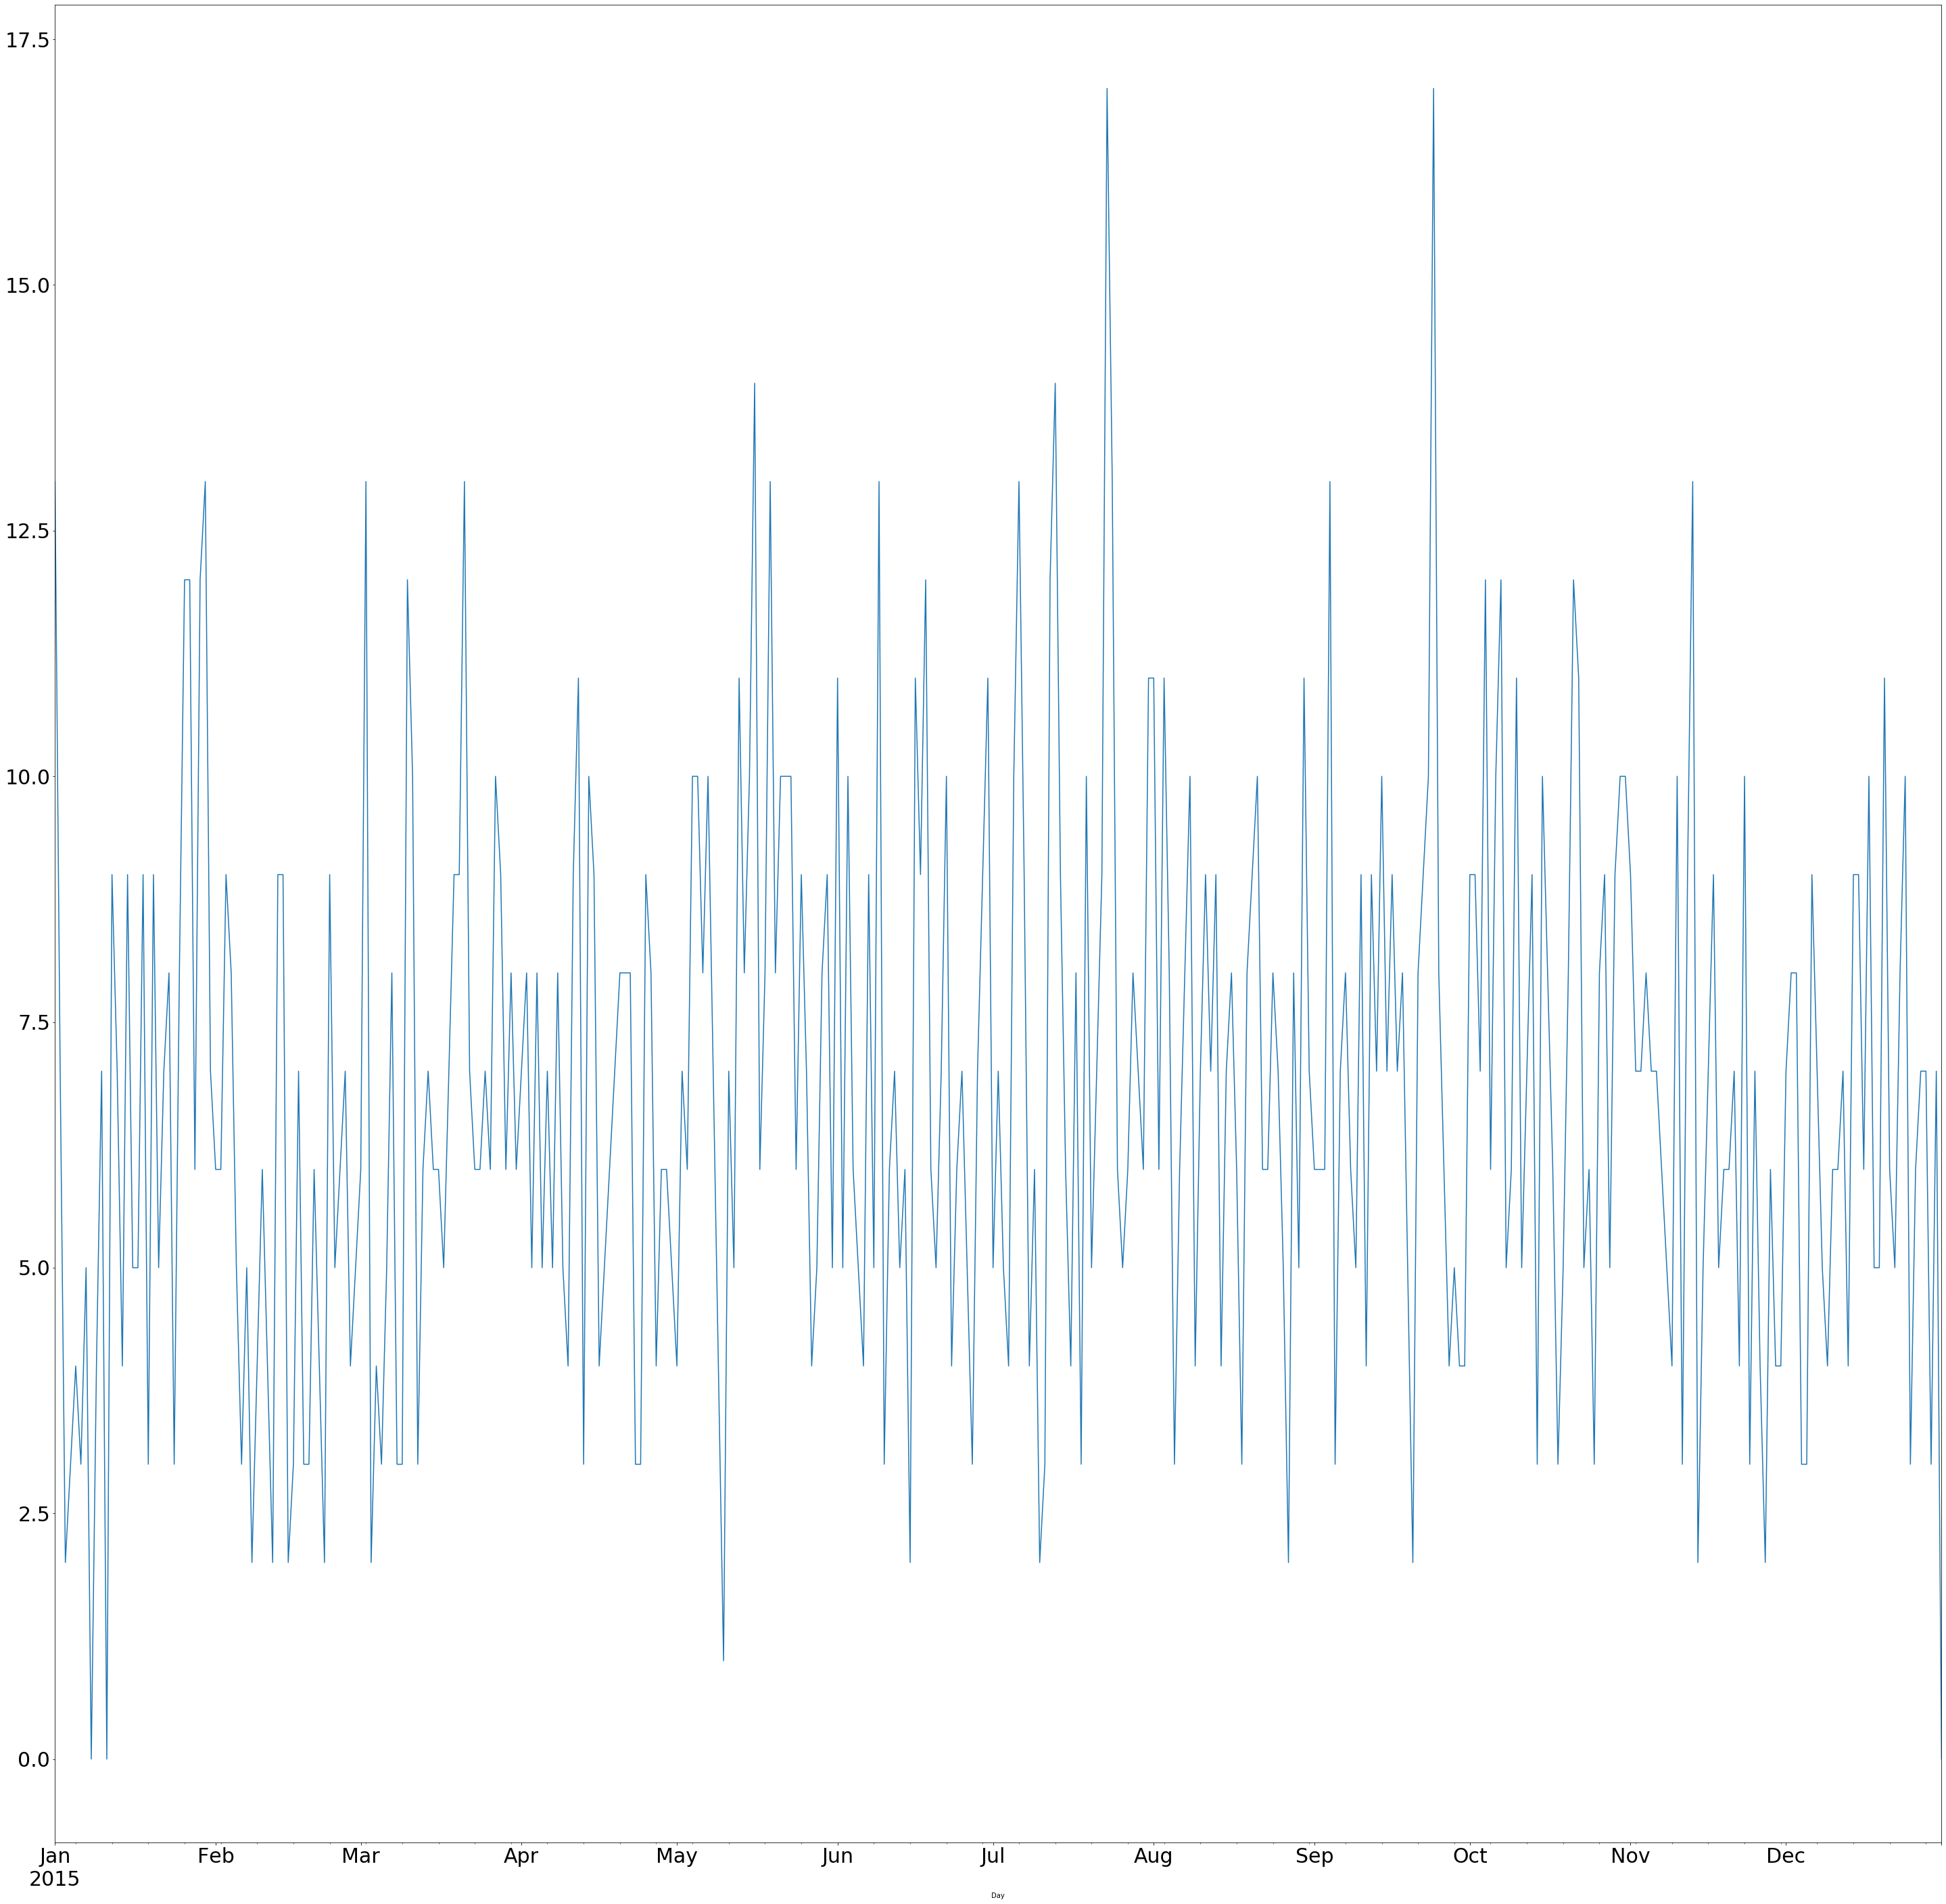

In [9]:
dates[35].plot(fontsize = 30)
plt.rcParams['figure.figsize'] = [50.0,50.0];

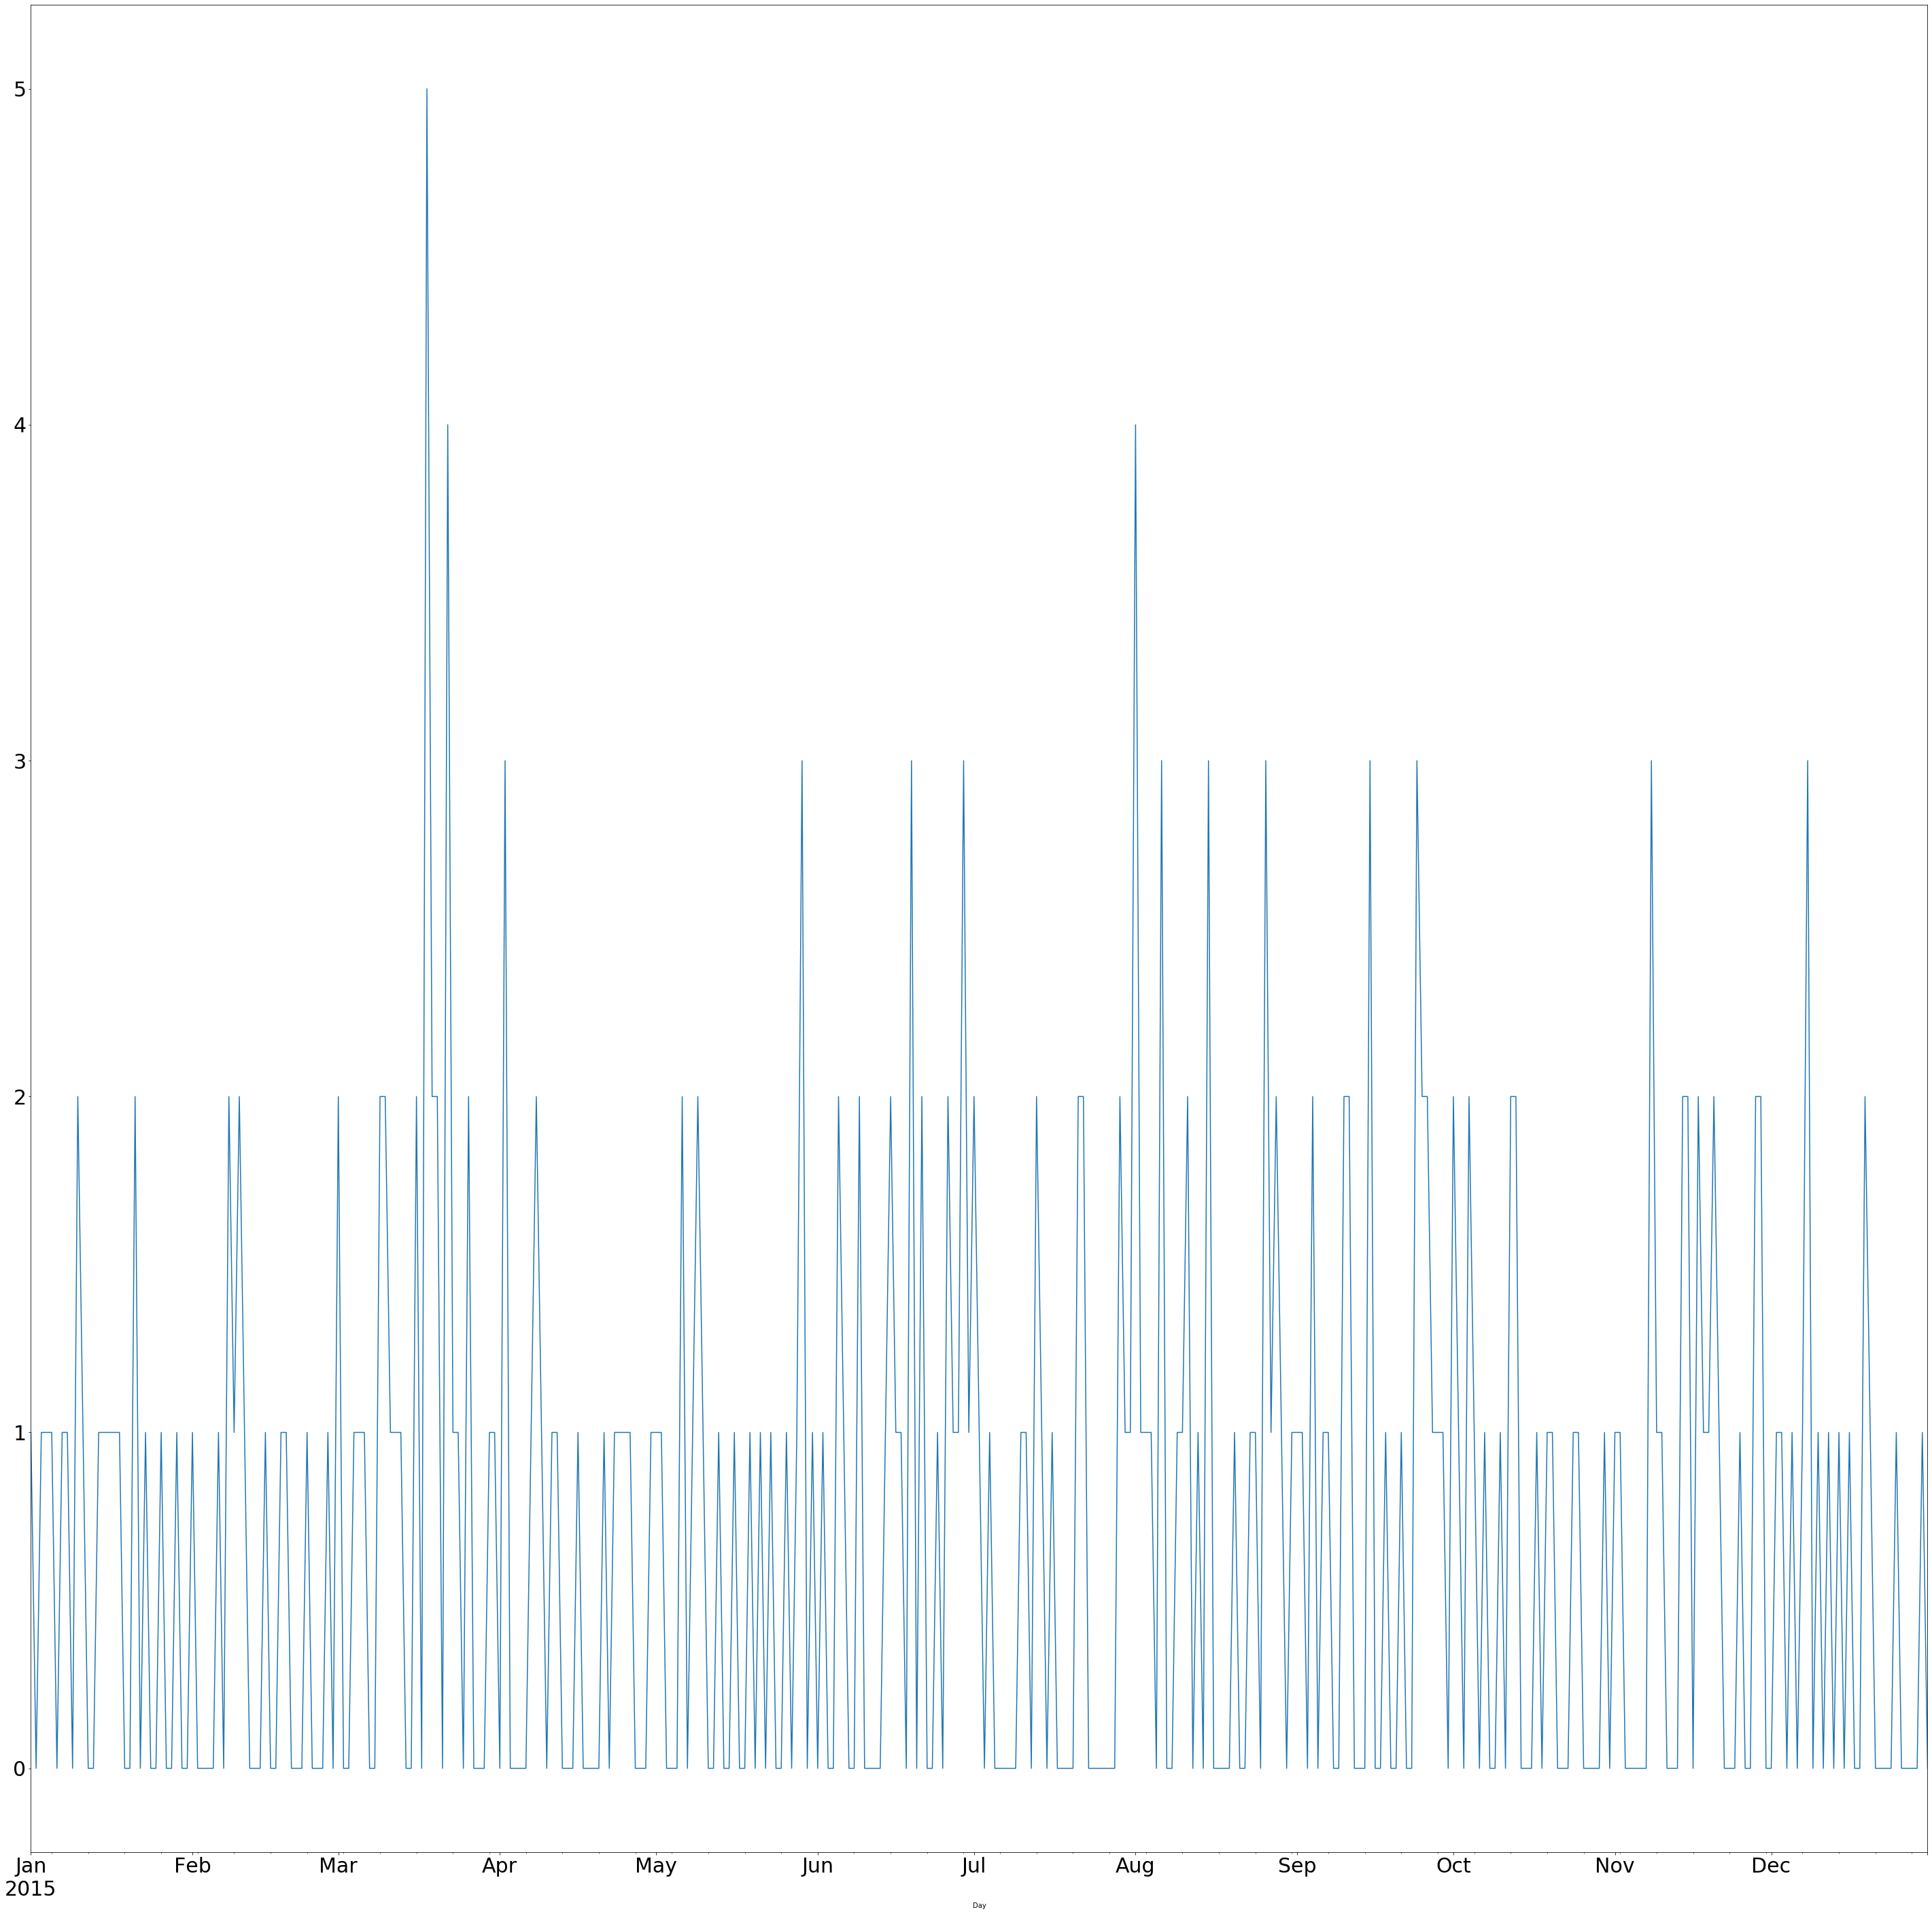

In [10]:
dates[9].plot(fontsize = 30)
plt.rcParams['figure.figsize'] = [50.0,50.0];

---

### Parte voluntaria

Descargue la base de datos de información socioeconómica (https://data.cityofchicago.org/Health-Human-Services/Census-Data-Selected-socioeconomic-indicators-in-C/kn9c-c2s2).

### 4.
Cree una tabla que agregue el número de crímenes por Community Area. Una esa tabla con la de datos socioeconómicos y cree un "scatter plot" de número de crímenes vs ingreso per cápita. Explique la relación en palabras.

---